In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 한글깨짐 방지
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
os.chdir(r"./data")

In [3]:
data = pd.read_csv("Traffic_Accident_2017.csv", encoding='euc-kr')
data.T

,0,1,2,3,4,5,6,7,8,9,...,4055,4056,4057,4058,4059,4060,4061,4062,4063,4064
발생년,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
발생년월일시,2017010101,2017010102,2017010102,2017010102,2017010104,2017010104,2017010105,2017010109,2017010118,2017010120,...,2017123023,2017123100,2017123107,2017123112,2017123117,2017123118,2017123118,2017123119,2017123120,2017123123
발생분,15,28,43,22,37,0,50,25,33,0,...,50,50,4,10,56,10,25,55,40,15
주야,야간,야간,야간,야간,야간,야간,야간,주간,야간,야간,...,야간,야간,주간,주간,주간,야간,야간,야간,야간,야간
요일,일,일,일,일,일,일,일,일,일,일,...,토,일,일,일,일,일,일,일,일,일
사망자수,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
사상자수,2,1,2,1,1,2,1,5,3,7,...,6,1,1,1,1,4,1,1,11,1
중상자수,1,0,0,0,0,1,0,3,1,4,...,2,0,0,0,0,1,0,0,1,0
경상자수,0,0,1,0,0,0,0,1,1,2,...,3,0,0,0,0,0,0,0,9,0
부상신고자수,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


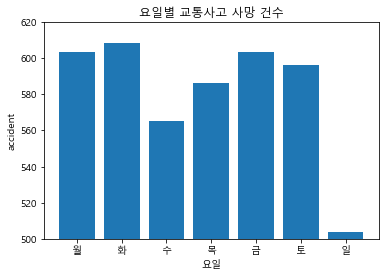

In [18]:
t = data["요일"].value_counts()
y = t[['월', '화', '수', '목', '금', '토', '일']]
x = ['월', '화', '수', '목', '금', '토', '일']

plt.ylim(500, 620)

plt.bar(x, y)
plt.title("요일별 교통사고 사망 건수")
plt.ylabel('accident')
plt.xlabel("요일")
plt.show()

### 차대차 사고 다발 지역

In [55]:
t = data[['발생지시도', '사고유형_대분류']][data['사고유형_대분류']== "차대차"]

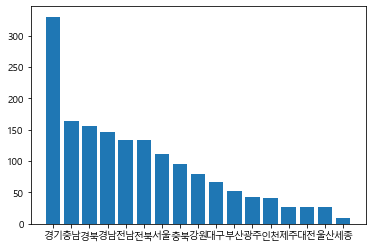

In [56]:
t = t['발생지시도'].value_counts()

y = t.values
x = t.index

plt.bar(x, y)
plt.show()

### 교통시간 시간대 시각화

In [57]:
# 카테고리
ages = [0, 2, 10, 21, 23, 37, 31, 61 ,20, 41, 32, 100]
bins = [0, 15, 25, 35 , 60, 99]
labels = ['미성년자', '청년', '중년', '장년', '노년']
cats = pd.cut(ages, bins, labels=labels)
cats

[NaN, 미성년자, 미성년자, 청년, 청년, ..., 노년, 청년, 장년, 중년, NaN]
Length: 12
Categories (5, object): [미성년자 < 청년 < 중년 < 장년 < 노년]

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           4065 non-null   int64  
 1   발생년월일시        4065 non-null   int64  
 2   발생분           4065 non-null   int64  
 3   주야            4065 non-null   object 
 4   요일            4065 non-null   object 
 5   사망자수          4065 non-null   int64  
 6   사상자수          4065 non-null   int64  
 7   중상자수          4065 non-null   int64  
 8   경상자수          4065 non-null   int64  
 9   부상신고자수        4065 non-null   int64  
 10  발생지시도         4065 non-null   object 
 11  발생지시군구        4065 non-null   object 
 12  사고유형_대분류      4065 non-null   object 
 13  사고유형_중분류      4065 non-null   object 
 14  사고유형          4065 non-null   object 
 15  법규위반_대분류      4065 non-null   object 
 16  법규위반          4065 non-null   object 
 17  도로형태_대분류      4065 non-null   object 
 18  도로형태          4065 non-null 

In [69]:
bins = [-1, 2, 5, 8, 11, 14, 17, 20, 24]
labels = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20','21-23']
time_df = data['발생년월일시'] % 100

time_cats = pd.cut(time_df.values, bins, labels=labels)

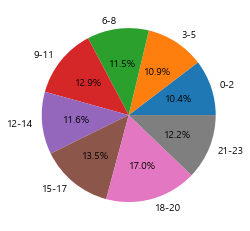

In [78]:
t = time_cats.value_counts()

plt.pie(t, labels=labels, autopct='%1.1f%%')
plt.show()

In [82]:
import pandas as pd
import numpy as np
import os

os.chdir(r"../data")
df = pd.read_excel(r'남북한발전전력량.xlsx')

In [83]:
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


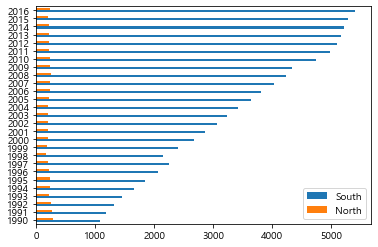

In [104]:
t = df.iloc[[0, 5], 2:]
t.index = ['South', 'North']
t.columns = t.columns.map(int)
t.T.plot(kind='barh')

In [108]:
df = pd.read_csv('auto-mpg.csv', header=None)

In [111]:
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


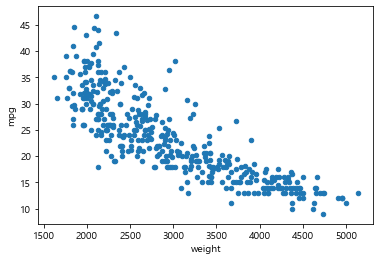

In [113]:
# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df.plot(x='weight', y = 'mpg', kind='scatter')